#### 1.데이터 로드

In [1]:
from tensorflow import keras

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

#### 2.데이터 탐색

In [3]:
# 60000개의 이미지로 구성
# 28 x 28 픽셀
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [4]:
# 10000개의 이미지로 구성
# 28 x 28 픽셀
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


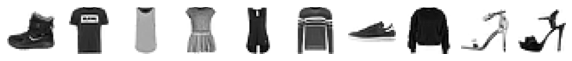

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [6]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [7]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [8]:
# 패션 MNIST는 0~9(10개 패션 아이템 카테고리)

# 티셔츠, 바지, 스웨터, 드레스, 코드, 샌달, 셔츠, 스니커즈, 가방, 앵클부츠

#### 3.데이터 전처리

In [9]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [10]:
print(train_scaled.shape)

(60000, 784)


#### 4.인공신경망

In [11]:
import tensorflow as tf
from tensorflow import keras

In [12]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [13]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [14]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [15]:
# layer는 신경망 층!
# dense => 밀집
# : 784개 input과 10개가 모두 선으로 이루어져 있음
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
# 10: 뉴런 개수
# activation: 뉴런의 출력에 적용할 함수
# input_shape: 입력 크기

In [16]:
# Model 생성
model = keras.Sequential(dense)
# 그림 그려주기!!!
# input 784 => dense 10 => softmax => output

In [17]:
# loss: 손실함수
# metrics: 평가 지표

# 타깃값을 원핫 인코딩으로 해서 소프트맥스에서 나온 출력값을 타깃값과 곱함
# softmax output(a1, a2, a3, ....)
# 정답: 원핫 인코딩(1, 0, 0, 0, 0, ...)
# 각각 곱하면 실제 정답 아이테 말고나느 나머지는 다 0으로 변경됨
# 정답말고 나머지의 확률은 중요하지 않음, 정답일 확률이 1에 가까워지게 하는게 중요!

# sparse_categorical_crossentropy 에서 sparse는
#   뺵뺵한 배열말고 정수값 하나만 사용한다는 뜻
# 타깃값이 원핫인코딩이 아닌경우 spare_ 붙은 거사용
# 타깃값이 원핫인코딩인 경우 categorical_crossentropy 사용하면 됨
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [18]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [19]:
# 입력, 정답, 학습횟수!(epochs)
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 711us/step - loss: 0.6013 - accuracy: 0.7974
Epoch 2/5
1500/1500 [==============================] - 1s 687us/step - loss: 0.4787 - accuracy: 0.8387
Epoch 3/5
1500/1500 [==============================] - 1s 692us/step - loss: 0.4554 - accuracy: 0.8485
Epoch 4/5
1500/1500 [==============================] - 1s 702us/step - loss: 0.4444 - accuracy: 0.8530
Epoch 5/5
1500/1500 [==============================] - 1s 694us/step - loss: 0.4375 - accuracy: 0.8553


In [20]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 666us/step - loss: 0.4666 - accuracy: 0.8406


[0.4666222631931305, 0.840583324432373]

#### 5.심층신경망 만들기

> 활성화 함수 사용 이유:
> 신경망 층의 선형 방정식의 계산 값에 적용하는 함수

- 출력층에 적용하는 활성화 함수는 제한적
- 분류문제에서는 클래스에 대한 확률을 출력하기 위해 활성화 함수 사용
- 회귀의 출력은 어떤 임의의 숫자임으로 활성화 함수 적용 필요 X => 선형 방정식 계산 그대로 출력

#### 활성화 함수 사용하는 이유는?

2개의 선형방정식이 있음  
$a * 4 + 2 = b$  
$b * 3 - 5 = c$  
$a * 12 + 1 = c$

> 하나의 식으로 변경 가능, 층을 추가해도 아무 의미가 없음

은닉층에서 선형적인 산술 계산만 수행한다면 수행 역할이 없는 셈  
=> 선형계산을 적당하게 비선형적으로 비틀어주어야 함  
$a * 4 + 2 = b$  
$log(b) = k$  
$k * 3 - 5 = c$  


In [21]:
# 시그모이드 함수: 가장 기본적인 함수
# - 출력 z값을 0~1사이의 값으로 압축
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [22]:
model = keras.Sequential([dense1, dense2])

In [23]:
# 뉴런마다 절편 1개씩 존재
# 784 * 100 + 100 = 78500

# (None, 100)
# None는 샘플의 개수, 샘플의 개수 아직 정의 안됨
# mini batch 활용, keras는 기본 미니 배치는 32
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


#### 6.층울 추가하는 다른 방법

In [24]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [25]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 가장 많이 사용!
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 952us/step - loss: 0.5650 - accuracy: 0.8074
Epoch 2/5
1500/1500 [==============================] - 1s 935us/step - loss: 0.4112 - accuracy: 0.8508
Epoch 3/5
1500/1500 [==============================] - 1s 938us/step - loss: 0.3748 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 1s 922us/step - loss: 0.3514 - accuracy: 0.8741
Epoch 5/5
1500/1500 [==============================] - 1s 926us/step - loss: 0.3349 - accuracy: 0.8790


In [29]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 758us/step - loss: 0.3520 - accuracy: 0.8741


[0.35203930735588074, 0.8740833401679993]

#### 7.Relu 활성화 함수
- 시그모이드 함수는 단점이 존재
- 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있음, 올바른 출력을 만드는데 신속하게 대응 못함
- 특히 층이 더 많으면 그 효과가 누적되어 학습이 더 어려움

> 시그모이드 대체로 Relu

- Relu는 음수일때는 0, 양수일 떄는 활성화 함수가 없는 것 마냥 그대로 통과

In [30]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [32]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [33]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 919us/step - loss: 0.5348 - accuracy: 0.8099
Epoch 2/5
1500/1500 [==============================] - 1s 913us/step - loss: 0.3950 - accuracy: 0.8591
Epoch 3/5
1500/1500 [==============================] - 1s 909us/step - loss: 0.3545 - accuracy: 0.8713
Epoch 4/5
1500/1500 [==============================] - 1s 948us/step - loss: 0.3363 - accuracy: 0.8792
Epoch 5/5
1500/1500 [==============================] - 1s 941us/step - loss: 0.3200 - accuracy: 0.8863


In [34]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 749us/step - loss: 0.3592 - accuracy: 0.8763


[0.35924288630485535, 0.8763333559036255]

#### 8.옵티마이저

- 경사하강법 알고리즘 => 옵티마이저
- Keras는 기본적으로 RMSprop
- 모델이 최적점에 가까워지면 학습률을 낮출 수 있음(적응적 학습률)

> 하이퍼파라미터 튜닝!! 노드 수부터!

1.loss function은 얼마나 틀리는지(loss) 계산
2.loss function의 최소값을 찾는 것을 학습의 목표
3.최소값을 찾아가는 것을 최적화(optimizer)

산에서 내려오는거 생각
산에서 내려오는게 목표
보폭이 learning_late
epoch는 산을 내려오는 행위를 몇번 반복하면서 공부할 것인지



In [35]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [36]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [37]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [38]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [39]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [40]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 887us/step - loss: 0.5254 - accuracy: 0.8159
Epoch 2/5
1500/1500 [==============================] - 1s 869us/step - loss: 0.3944 - accuracy: 0.8574
Epoch 3/5
1500/1500 [==============================] - 1s 849us/step - loss: 0.3532 - accuracy: 0.8700
Epoch 4/5
1500/1500 [==============================] - 1s 903us/step - loss: 0.3241 - accuracy: 0.8805
Epoch 5/5
1500/1500 [==============================] - 1s 927us/step - loss: 0.3063 - accuracy: 0.8871


In [41]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 698us/step - loss: 0.3397 - accuracy: 0.8738


[0.33968067169189453, 0.8738333582878113]

#### 9.손실 곡선

In [42]:
# 모델을 함수로 생성해서 사용!
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [43]:
model = model_fn()

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [44]:
# History 객체: 훈련과정에서 계산한 지표, 즉 손실과 정확도 값이 저장
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [45]:
# History 객체에 "loss"와 "accuracy"가 리스트로 저장되어 있음
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


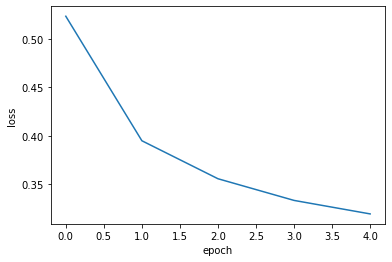

In [46]:
# epoch가 증가할수록 loss가 떨어짐
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

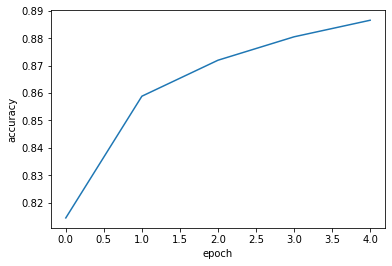

In [47]:
# epoch가 증가할수록 정확도 향상됨
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [48]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

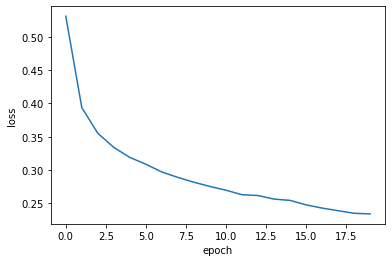

In [49]:
# epoch를 20으로 늘렸더니 loss가 더 떨어짐
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### 10.검증 손실

- 인공신경망 모델이 최적화하는 대상은 정확도가 아니라 손실함수!
- 손실감소에 비례하여 정확도가 높아지지 않는 경우도 있음
- 따라서, 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실함수 값을 확인

In [50]:
# epoch와 과소/과대 적합 확인을 위해 validation 사용
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# validation 추가
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [51]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


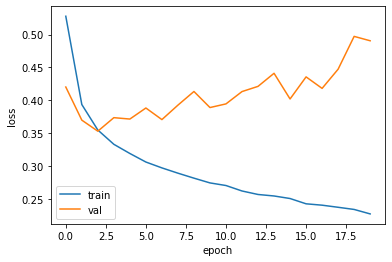

In [52]:
# 검증손실이 epoch 2번부터 증가함
# 학습손실은 꾸준히 감소(과대적합)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [59]:
# 옵티마이저 "adam"으로 교체, 적응형 학습률을 사용해서 epoch가 진행되면서 학습률의 크기 조정 가능
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

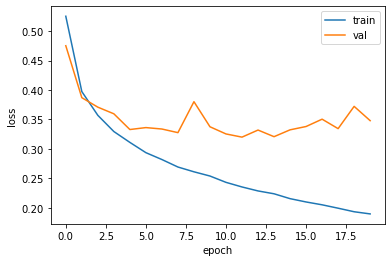

In [54]:
# 과대적합이 많이 줄어듬
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#### 11.드롭아웃

- 제프리 힌튼이 소개
- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(즉 뉴런의 출력을 0으로 만들어) 과대적합을 막음
- train만 사용, valid와 test에는 드롭아웃 사용하면 안됨
- Tensorflow와 Keras는 똑똑하게 valid와 test에서 드롭아웃 적용하지 않음

> 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 함(더 안정적인 예측을 만들 수 있음)

In [60]:
# 드롭아웃을 사용해서 입력과 출력의 크기는 동일
# 일부 뉴런의 출력을 0으로 만들지만 전체 출력의 배열의 크기를 바꾸지는 않음
# 0.3은 rate 이전 층에서 30%의 노드들을 무작위로 0으로 만듬
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

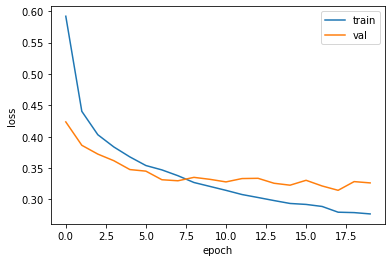

In [62]:
# epoch 10번부터 과대적합되기 때문에
# epoch를 10으로 변경하고 다시 학습!
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

#### 12.모델 저장과 복원

In [63]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [64]:
# weight만 저장
model.save_weights('model-weights.h5')

In [65]:
# 모델 구조 + weight
model.save('model-whole.h5')

In [67]:
model = model_fn(keras.layers.Dropout(0.3))

# load_weights를 사용하기 위해서는 save_weights()를 사용해서 저장했던 모델과 정확히 같은 구조를 가져야 함
model.load_weights('model-weights.h5')

In [68]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8805


In [69]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 798us/step - loss: 0.3270 - accuracy: 0.8805


[0.3270442485809326, 0.8805000185966492]

#### 13.콜백
- 훈련과정 중간에 어떤작업을 수행할 수 있는 객체
- ModelCheckPoint는 epoch마다 모델 저장
- save_best_only는 가장 낮은 검증 점수를 만드는 모델을 거장

In [70]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [71]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 754us/step - loss: 0.3159 - accuracy: 0.8884


[0.31591862440109253, 0.8884166479110718]

##### 검증점수가 상승하면 과대적합이기 때문에 훈련 더 할 필요 없음
  - 훈련 중지 필요!!

##### early stoping(조기 종료)
- epoch 횟수를 제한(과대적합 막아줌)
- patience=2 2번 연속 검증점수가 향상되지 않으면 훈련 중지
- restore_best_weights는 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림

> early stoping과 ModelCheckPoint를 함께 사용하면 가증 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 경우 훈련 중지 가능, 훈련 중지 후 모델의 파라미터를 최상의 파라미터로 되돌림

In [76]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [73]:
print(early_stopping_cb.stopped_epoch)

12


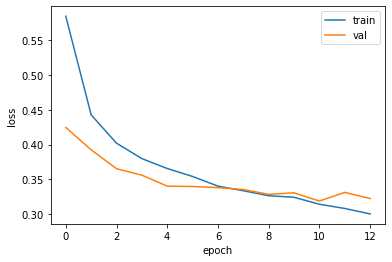

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [75]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 741us/step - loss: 0.3190 - accuracy: 0.8823


[0.3190012574195862, 0.8823333382606506]